In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split


In [2]:
df_train=pd.read_csv('../input/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Removing columns with a lot of NAN data since there is no point in analyzing them**

In [3]:
missing_val_count_by_column = (df_train.isnull().sum(axis=0))

cols_with_missing_values=np.array(missing_val_count_by_column[missing_val_count_by_column > 0].index)
print('Columns with missing values: {}'.format((cols_with_missing_values)))
 
cols_with_missing_more_than_75_percent =np.array(missing_val_count_by_column[missing_val_count_by_column > len(df_train.index)*(3/4)].index)
print('Columns with more than 75 percent missing values: {}'.format((cols_with_missing_more_than_75_percent)))


Columns with missing values: ['LotFrontage' 'Alley' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Electrical' 'FireplaceQu'
 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond'
 'PoolQC' 'Fence' 'MiscFeature']
Columns with more than 75 percent missing values: ['Alley' 'PoolQC' 'Fence' 'MiscFeature']


In [4]:
#Before removing NaN data, let's check the data_description file, whether there's been data incorrectly labeled as NaN.
#After looking at the data_description file, I notice that there is a list of columns that are be labeled incorrectly as NaN
#meaning that they provide no information, while in fact they are just recognizing that there is a lack of certain attribute(i.e.
# the house has no garage, which does not mean that we should label it as NaN).
#So the list we should be careful of is:
special_columns=np.array(['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
                 'GarageFinish'  ,'GarageQual','GarageCond','PoolQC','Fence','MiscFeature'])
for col in special_columns:
    dic={}
    for ind,val in df_train[col].iteritems():
        dic[val] = dic.get(val, 0) + 1
    print(col,dic)

# print(len(special_columns))
# print(len(cols_with_missing_values))

# print(np.setdiff1d(cols_with_missing_values,special_columns))

# # for col in cols_with_missing_values:
# #     print(df_train[col])

Alley {nan: 1369, 'Grvl': 50, 'Pave': 41}
BsmtQual {'Gd': 618, 'TA': 649, 'Ex': 121, nan: 37, 'Fa': 35}
BsmtCond {'TA': 1311, 'Gd': 65, nan: 37, 'Fa': 45, 'Po': 2}
BsmtExposure {'No': 953, 'Gd': 134, 'Mn': 114, 'Av': 221, nan: 38}
BsmtFinType1 {'GLQ': 418, 'ALQ': 220, 'Unf': 430, 'Rec': 133, 'BLQ': 148, nan: 37, 'LwQ': 74}
BsmtFinType2 {'Unf': 1256, 'BLQ': 33, nan: 38, 'ALQ': 19, 'Rec': 54, 'LwQ': 46, 'GLQ': 14}
FireplaceQu {nan: 690, 'TA': 313, 'Gd': 380, 'Fa': 33, 'Ex': 24, 'Po': 20}
GarageType {'Attchd': 870, 'Detchd': 387, 'BuiltIn': 88, 'CarPort': 9, nan: 81, 'Basment': 19, '2Types': 6}
GarageFinish {'RFn': 422, 'Unf': 605, 'Fin': 352, nan: 81}
GarageQual {'TA': 1311, 'Fa': 48, 'Gd': 14, nan: 81, 'Ex': 3, 'Po': 3}
GarageCond {'TA': 1326, 'Fa': 35, nan: 81, 'Gd': 9, 'Po': 7, 'Ex': 2}
PoolQC {nan: 1453, 'Ex': 2, 'Fa': 2, 'Gd': 3}
Fence {nan: 1179, 'MnPrv': 157, 'GdWo': 54, 'GdPrv': 59, 'MnWw': 11}
MiscFeature {nan: 1406, 'Shed': 49, 'Gar2': 2, 'Othr': 2, 'TenC': 1}


In [5]:
df_train.loc[df_train.Alley.isnull(),'Alley']='NoAlley'
df_train.loc [df_train.BsmtQual .isnull(),'BsmtQual']='NoBasement'
df_train.loc [df_train.BsmtCond .isnull(),'BsmtCond']='NoBasement'
df_train.loc [df_train.BsmtExposure .isnull(),'BsmtExposure']='NoBasement'
df_train.loc [df_train.BsmtFinType1 .isnull(),'BsmtFinType1']='NoBasement'
df_train.loc [df_train.BsmtFinType2 .isnull(),'BsmtFinType2']='NoBasement'
df_train.loc [df_train.FireplaceQu .isnull(),'FireplaceQu']='NoFireplace'
df_train.loc [df_train.GarageType .isnull(),'GarageType']='NoGarage'
df_train.loc [df_train.GarageFinish .isnull(),'GarageType']='NoGarage'
df_train.loc [df_train.GarageQual .isnull(),'GarageQual']='NoGarage'
df_train.loc [df_train.GarageCond .isnull(),'GarageCond']='NoGarage'
df_train.loc [df_train.PoolQC .isnull(),'PoolQC']='NoPool'
df_train.loc [df_train.Fence .isnull(),'Fence']='NoFence'
df_train.loc[df_train.MiscFeature .isnull(),'MiscFeature']='NoMisc'

In [8]:
#Let's check missing values again
missing_val_count_by_column = (df_train.isnull().sum(axis=0))

cols_with_missing_values=np.array(missing_val_count_by_column[missing_val_count_by_column > 0].index)
print('Columns with missing values: {}'.format((cols_with_missing_values)))
 
cols_with_missing_more_than_75_percent =np.array(missing_val_count_by_column[missing_val_count_by_column > len(df_train.index)*(3/4)].index)
print('Columns with more than 75 percent missing values: {}'.format((cols_with_missing_more_than_75_percent)))

# df_train=df_train.drop(cols_with_missing_more_than_75_percent,axis=1)

Columns with missing values: ['LotFrontage' 'MasVnrType' 'MasVnrArea' 'Electrical' 'GarageYrBlt'
 'GarageFinish']
Columns with more than 75 percent missing values: []




**Let's visualize the numerical data first**



In [9]:
num_columns=df_train.select_dtypes(exclude=['object']).columns
cat_columns=df_train.select_dtypes(include=['object']).columns

print(num_columns)
print(cat_columns)
print(len(num_columns))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

**Histograms**

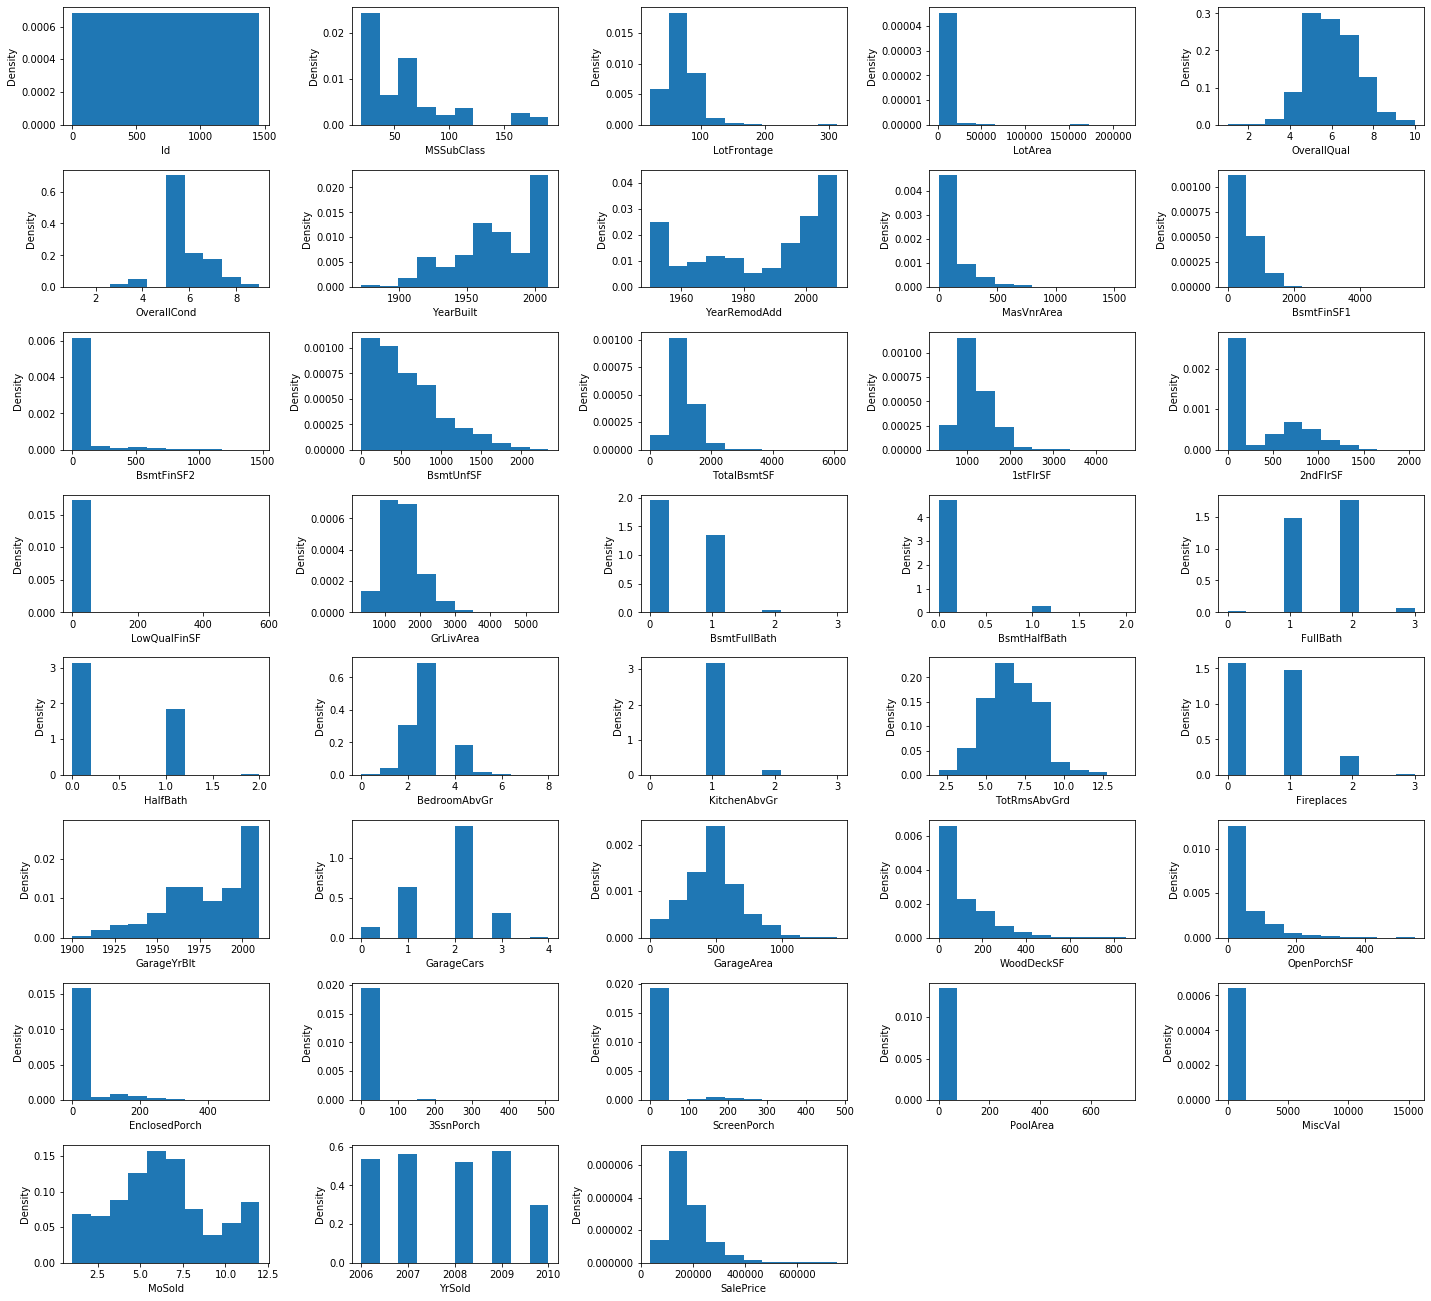

In [6]:
fig = plt.figure(figsize=(20,20))
i=1
for col in num_columns:
    sub=fig.add_subplot(9,5,i)
    i+=1
    sub.hist(df_train[col].dropna(),density=True)
    sub.set_xlabel(col)
    sub.set_ylabel('Density')
fig.tight_layout()
plt.show()
plt.close()



**Boxplots**

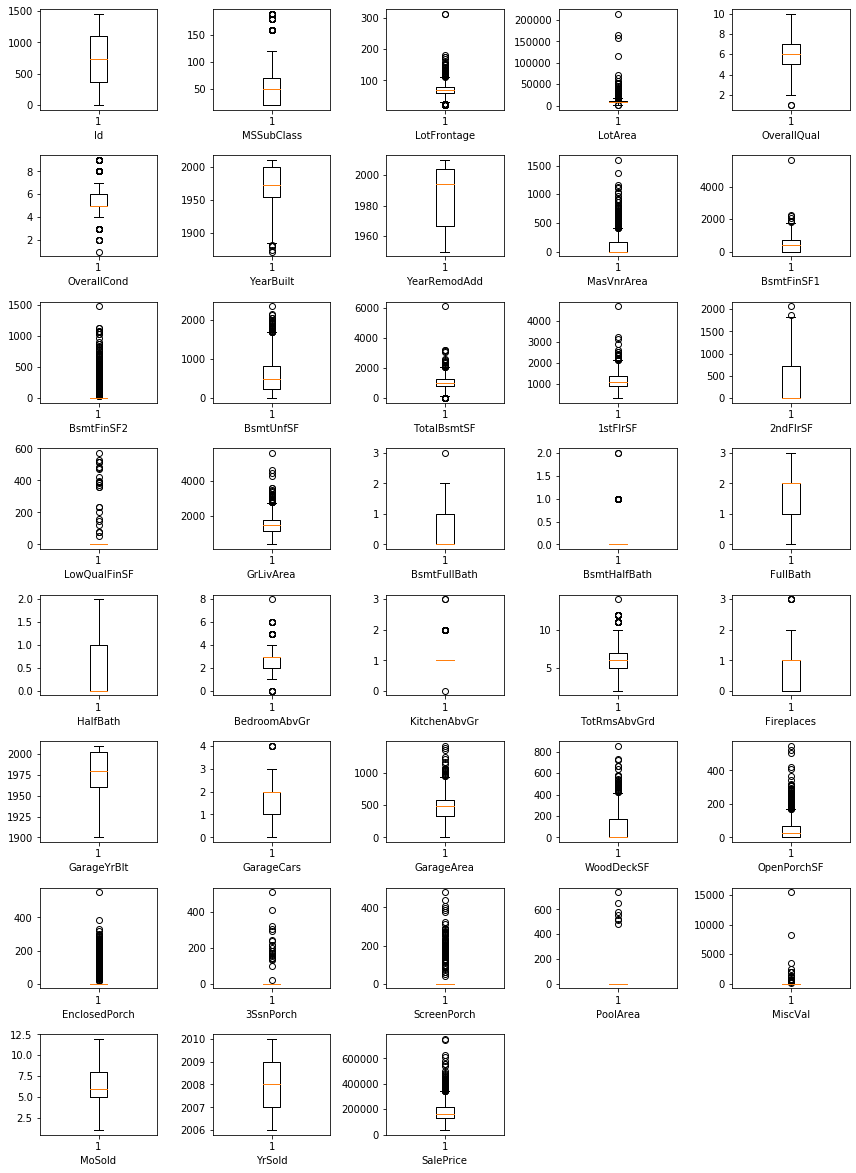

In [7]:
fig = plt.figure(figsize=(12, 18))
i=1
for col in num_columns:
    sub=fig.add_subplot(9, 5, i)
    i+=1
    sub.boxplot(df_train[col].dropna())
    sub.set_xlabel(col)


plt.tight_layout()
plt.show()
plt.close()

**Some outliers are clearly visible. The question is which ones should be removed(if any).**

**Next, let's see if there are highly correlated variables (that is two variables having a high correlation between them and also both of them have a realtively high correlation with SalePrice) that we may remove**

In [8]:
correlation = df_train.corr()

correlation.style.background_gradient(cmap='coolwarm')



In [9]:
for row,series in correlation.iterrows():
    for index,value in series.iteritems():
        if value>0.8 and row!=index:
               print(index,row,value)

                
print('Will exclude GarageArea  and GarageYrBlt ')
print(correlation.SalePrice['GarageArea'],correlation.SalePrice['GarageCars'])

GarageYrBlt YearBuilt 0.8256674841743434
1stFlrSF TotalBsmtSF 0.8195299750050355
TotalBsmtSF 1stFlrSF 0.8195299750050355
TotRmsAbvGrd GrLivArea 0.8254893743088377
GrLivArea TotRmsAbvGrd 0.8254893743088377
YearBuilt GarageYrBlt 0.8256674841743434
GarageArea GarageCars 0.8824754142814603
GarageCars GarageArea 0.8824754142814603
Will exclude GarageArea  and GarageYrBlt 
0.6234314389183598 0.640409197258349









**Exploring data by looking at the data description file**










In [29]:
#GarageCond and GarageQual seem equivalent. Nevertheless let's first check out the data

s=set(df_train.GarageCond)
dic={}
for ind,val in df_train.GarageCond.iteritems():
    dic[val] = dic.get(val, 0) + 1
print(dic)

#By looking at the description file, we see that all of the No Garage data is labeled as nan, which is incorrect

df_train.GarageCond[df_train.GarageCond.isnull()]='NG'
dic={}
for ind,val in df_train.GarageCond.iteritems():
    dic[val] = dic.get(val, 0) + 1
print(dic)


{'TA': 1326, 'Fa': 35, nan: 81, 'Gd': 9, 'Po': 7, 'Ex': 2}
{'TA': 1326, 'Fa': 35, 'NG': 81, 'Gd': 9, 'Po': 7, 'Ex': 2}


<ipython-input-29-628b8cce3236>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.GarageCond[df_train.GarageCond.isnull()]='NG'


In [20]:
s=set(df_train.GarageFinish)
print(s)

{nan, 'Fin', 'Unf', 'RFn'}
